In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Housing Price Competition

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [123]:
hp = pd.read_csv('train.csv')

In [122]:
# hp1.shape
# hp.info()

In [126]:
num_features = hp.select_dtypes(exclude='object').isnull().sum()


num_null_features = pd.DataFrame(data={'Missing Num Percentage: ': num_features[num_features>0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,Missing Num Percentage:
Numerical Features,
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [127]:
cat_features = hp.select_dtypes(include='object').isnull().sum()

num_cat_features = pd.DataFrame(data={'Missing Cat Percentage: ': cat_features[cat_features>0]})
num_cat_features.index.name = 'Catagorical Features'
num_cat_features

,Missing Cat Percentage:
Catagorical Features,
Alley,1369
MasVnrType,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


## Data Visualization

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1.0, 'High Correlation')

<AxesSubplot:title={'center':'High Correlation'}>

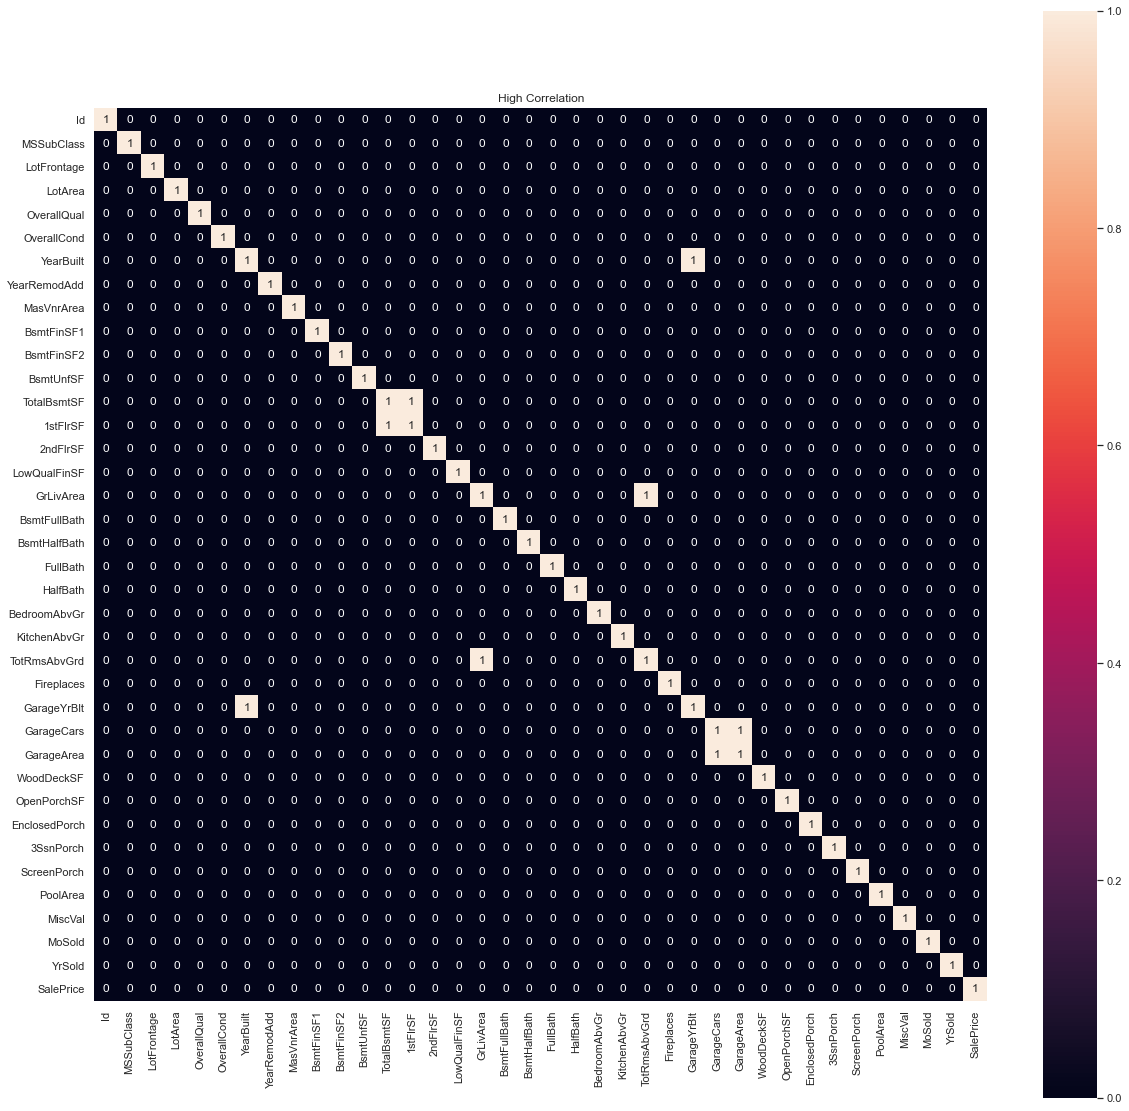

In [62]:
num_correlation = hp.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [ ]:
# Highly-Correlated Features:

# YearBuilt vs GarageYrBlt
# 1stFlrSF vs TotalBsmtSF
# GrLivArea vs TotRmsAbvGrd
# GarageCars vs GarageArea

In [82]:
corr = num_correlation.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.962500
GarageCars       0.903554
GarageArea       0.900257
TotalBsmtSF      0.817396
GrLivArea        0.814702
FullBath         0.811329
MasVnrArea       0.807608
1stFlrSF         0.797333
YearBuilt        0.785608
YearRemodAdd     0.762841
GarageYrBlt      0.756271
Fireplaces       0.731032
TotRmsAbvGrd     0.638194
OpenPorchSF      0.607920
LotFrontage      0.596063
WoodDeckSF       0.581711
BsmtFinSF1       0.515448
BsmtUnfSF        0.436888
HalfBath         0.406281
LotArea          0.384865
2ndFlrSF         0.288677
BsmtFullBath     0.288590
BedroomAbvGr     0.193856
PoolArea         0.046162
ScreenPorch      0.034179
MoSold          -0.022081
3SsnPorch       -0.032712
Id              -0.192466
YrSold          -0.207811
BsmtFinSF2      -0.215899
BsmtHalfBath    -0.234746
LowQualFinSF    -0.252426
MiscVal         -0.262012
MSSubClass      -0.263538
KitchenAbvGr    -0.362060
OverallCond     -0.471958
EnclosedPorch   -0.477651
Name: SalePr

In [83]:
hp.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF'],axis=1,inplace=True) 

In [84]:
# drop over 80% missed values
hp.isnull().mean().sort_values(ascending=False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

In [85]:
hp.drop(columns=['Alley','MiscFeature','PoolQC','Fence'], axis=1, inplace=True)

In [86]:
numeric = hp.select_dtypes(exclude='object')
categorical = hp.select_dtypes(include='object')


In [87]:
numeric['LotFrontage'] = numeric['LotFrontage'].fillna(numeric['LotFrontage'].mean())

<ipython-input-87-641448a5cac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['LotFrontage'] = numeric['LotFrontage'].fillna(numeric['LotFrontage'].mean())


In [88]:
numeric['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [89]:
# numeric.info()
# categorical.info()

### Distribution of Data

<AxesSubplot:>

<AxesSubplot:ylabel='Id'>

<AxesSubplot:>

<AxesSubplot:ylabel='MSSubClass'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotFrontage'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallQual'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallCond'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearBuilt'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearRemodAdd'>

<AxesSubplot:>

<AxesSubplot:ylabel='MasVnrArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF1'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF2'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtUnfSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotalBsmtSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='2ndFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='LowQualFinSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='GrLivArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtHalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='FullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='HalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BedroomAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='KitchenAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='Fireplaces'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageCars'>

<AxesSubplot:>

<AxesSubplot:ylabel='WoodDeckSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='OpenPorchSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='EnclosedPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='3SsnPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='ScreenPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='PoolArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MiscVal'>

<AxesSubplot:>

<AxesSubplot:ylabel='MoSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='YrSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='SalePrice'>

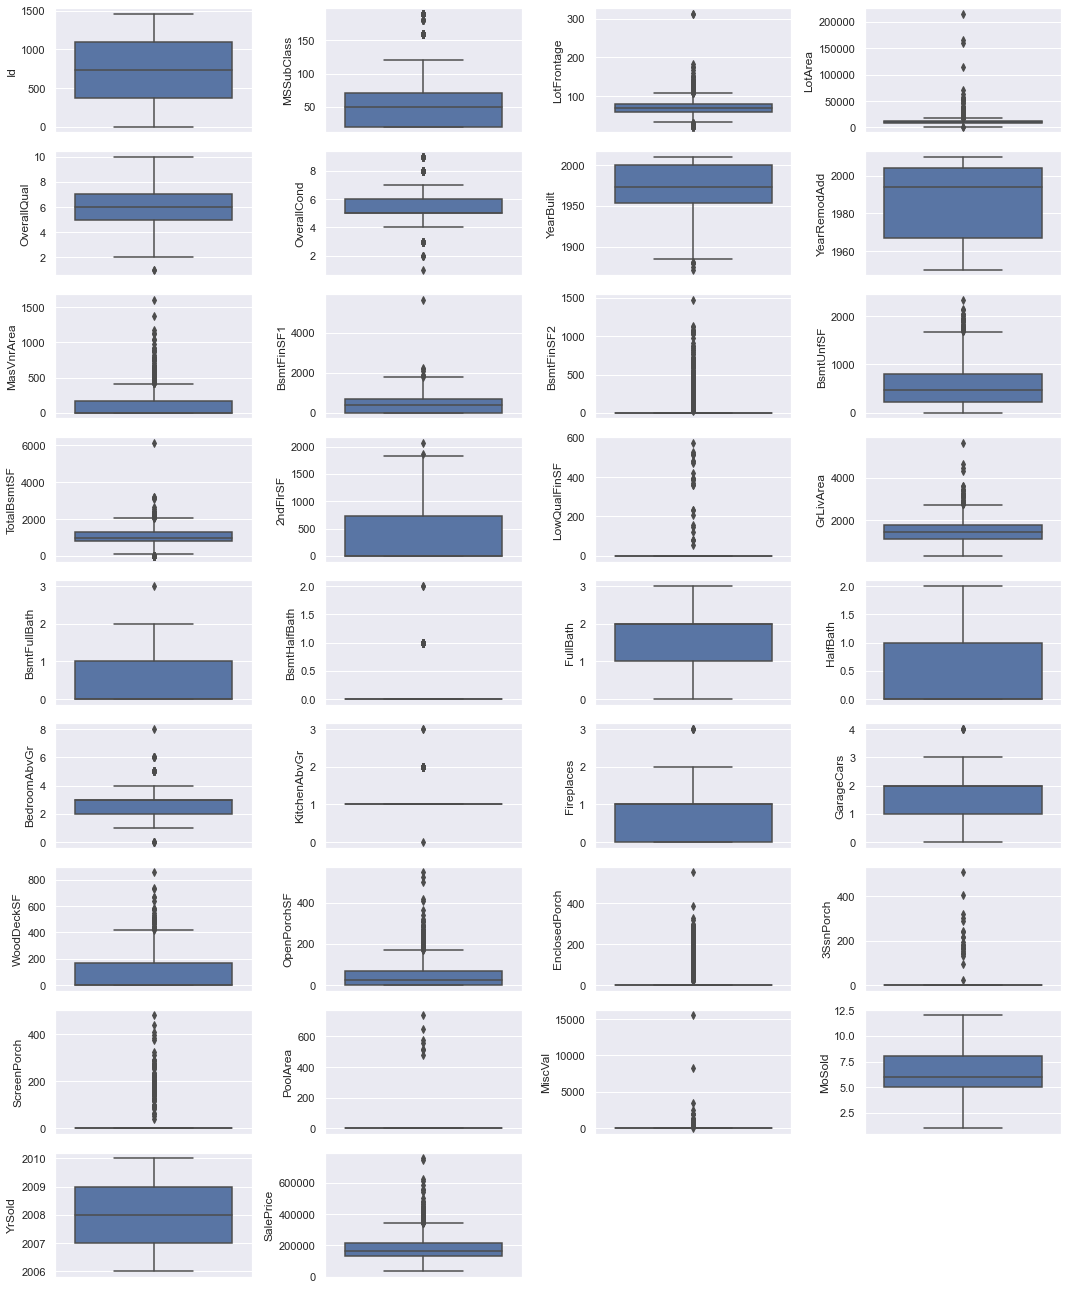

In [90]:
fig = plt.figure(figsize=(15,20))
for i in range(len(numeric.columns)):
    fig.add_subplot(10,4,i+1)
    sns.boxplot(y=numeric.iloc[:,i])

plt.tight_layout()
plt.show()

In [130]:
def remove_outliers(numeric, out_cols, T=1.5, verbose=True):
    # Copy of df
    new_df = numeric.copy()
    init_shape = new_df.shape
    # For each column
    for c in out_cols:
        q1 = new_df[c].quantile(.10)
        q3 = new_df[c].quantile(.90)
        col_iqr = q3 - q1
        col_max = q3 + T * col_iqr
        col_min = q1 - T * col_iqr
        # Filter data without outliers and ignoring nan
        filtered_df = new_df[(new_df[c] <= col_max) & (new_df[c] >= col_min)]
        if verbose:
            n_out = new_df.shape[0] - filtered_df.shape[0] 
            print(f" Columns {c} had {n_out} outliers removed")
        new_df = filtered_df
        
        
    if verbose:
        # Print shrink percentage
        lines_red = numeric.shape[0] - new_df.shape[0]
        print(f"Data reduced by {lines_red} lines, or {lines_red/numeric.shape[0]*100:.2f} %")
    return new_df


In [131]:
# df1 = pd.DataFrame(numeric, out_cols = ['BsmtFinSF2', 'LowQualFinSF'] )
# cleaned1 = remove_outliers(df1)
# cleaned1
cleaned1 = remove_outliers(numeric, out_cols = numeric.iloc[:,0:82])
cleaned1

 Columns Id had 0 outliers removed
 Columns MSSubClass had 0 outliers removed
 Columns LotFrontage had 7 outliers removed
 Columns LotArea had 23 outliers removed
 Columns OverallQual had 0 outliers removed
 Columns OverallCond had 1 outliers removed
 Columns YearBuilt had 0 outliers removed
 Columns YearRemodAdd had 0 outliers removed
 Columns MasVnrArea had 20 outliers removed
 Columns BsmtFinSF1 had 0 outliers removed
 Columns BsmtFinSF2 had 98 outliers removed
 Columns BsmtUnfSF had 0 outliers removed
 Columns TotalBsmtSF had 1 outliers removed
 Columns 2ndFlrSF had 0 outliers removed
 Columns LowQualFinSF had 23 outliers removed
 Columns GrLivArea had 0 outliers removed
 Columns BsmtFullBath had 1 outliers removed
 Columns BsmtHalfBath had 64 outliers removed
 Columns FullBath had 0 outliers removed
 Columns HalfBath had 0 outliers removed
 Columns BedroomAbvGr had 0 outliers removed
 Columns KitchenAbvGr had 61 outliers removed
 Columns Fireplaces had 3 outliers removed
 Columns 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,28,0,0,0,0,0,5,2006,145000
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0,...,36,56,0,0,0,0,0,7,2006,84500
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,113,0,0,0,0,0,10,2009,185000
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000


df_new = categorical.drop(cleaned1.index)

categorical_new = categorical.drop(df_new.index)
categorical_new

In [96]:
hp1 = pd.concat([categorical_new, cleaned1], axis=1)
hp1

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,208500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,250000
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,0,8,2007,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,0,28,0,0,0,0,0,5,2006,145000
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,36,56,0,0,0,0,0,7,2006,84500
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,0,113,0,0,0,0,0,10,2009,185000
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0,40,0,0,0,0,0,8,2007,175000


<AxesSubplot:>

<AxesSubplot:ylabel='Id'>

<AxesSubplot:>

<AxesSubplot:ylabel='MSSubClass'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotFrontage'>

<AxesSubplot:>

<AxesSubplot:ylabel='LotArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallQual'>

<AxesSubplot:>

<AxesSubplot:ylabel='OverallCond'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearBuilt'>

<AxesSubplot:>

<AxesSubplot:ylabel='YearRemodAdd'>

<AxesSubplot:>

<AxesSubplot:ylabel='MasVnrArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF1'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFinSF2'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtUnfSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='TotalBsmtSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='2ndFlrSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='LowQualFinSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='GrLivArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtFullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BsmtHalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='FullBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='HalfBath'>

<AxesSubplot:>

<AxesSubplot:ylabel='BedroomAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='KitchenAbvGr'>

<AxesSubplot:>

<AxesSubplot:ylabel='Fireplaces'>

<AxesSubplot:>

<AxesSubplot:ylabel='GarageCars'>

<AxesSubplot:>

<AxesSubplot:ylabel='WoodDeckSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='OpenPorchSF'>

<AxesSubplot:>

<AxesSubplot:ylabel='EnclosedPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='3SsnPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='ScreenPorch'>

<AxesSubplot:>

<AxesSubplot:ylabel='PoolArea'>

<AxesSubplot:>

<AxesSubplot:ylabel='MiscVal'>

<AxesSubplot:>

<AxesSubplot:ylabel='MoSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='YrSold'>

<AxesSubplot:>

<AxesSubplot:ylabel='SalePrice'>

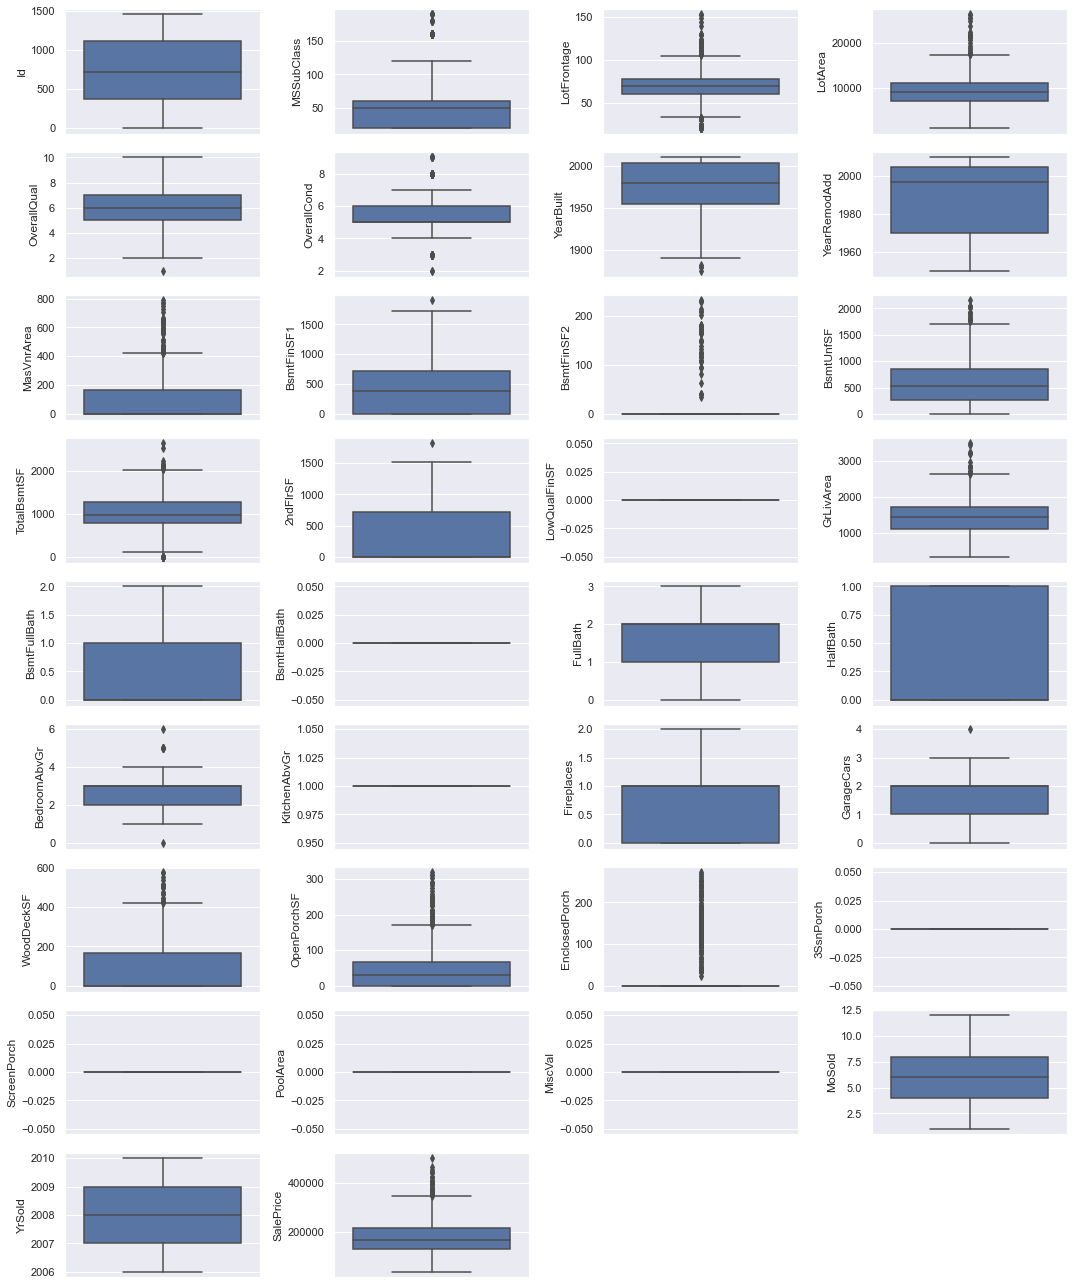

In [97]:
fig = plt.figure(figsize=(15,20))
for i in range(len(cleaned1.columns)):
    fig.add_subplot(10,4,i+1)
    sns.boxplot(y=cleaned1.iloc[:,i])

plt.tight_layout()
plt.show()

## Data Cleaning

In [98]:
null = pd.DataFrame(data={'Home Null Percentage': hp1.isnull().sum()[hp1.isnull().sum() > 0]})

null.index.name='Feature'
null

,Home Null Percentage
Feature,
BsmtQual,18
BsmtCond,18
BsmtExposure,19
BsmtFinType1,18
BsmtFinType2,18
Electrical,1
FireplaceQu,492
GarageType,50
GarageFinish,50


In [99]:
hp1.isnull().sum().sort_values(ascending=False)[:50]

FireplaceQu      492
GarageType        50
GarageQual        50
GarageFinish      50
GarageCond        50
BsmtExposure      19
BsmtFinType1      18
BsmtFinType2      18
BsmtCond          18
BsmtQual          18
Electrical         1
BsmtFinSF1         0
MasVnrArea         0
YearRemodAdd       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
2ndFlrSF           0
LowQualFinSF       0
YearBuilt          0
OverallCond        0
MSZoning           0
LotArea            0
GrLivArea          0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageCars         0
Fireplaces         0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
OverallQual        0
PavedDrive         0
LotFrontage        0
MSSubClass         0
LotShape           0
LandContour        0
Utilities    

In [100]:
home_num_features = hp1.select_dtypes(exclude='object').isnull().mean()


num_null_features = pd.DataFrame(data={'Missing Num Percentage: ': home_features[home_features>0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,Missing Num Home Percentage:
Numerical Features,


In [101]:
for df in [hp1]:
    for col in ('GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'LotFrontage', 
                'MasVnrArea', 'TotalBsmtSF'):
                    df[col] = df[col].fillna(0)

In [102]:
home_cat_features = hp1.select_dtypes(include='object').isnull().mean()

num_cat_features = pd.DataFrame(data={'Missing Cat Percentage: ': home_features[home_features>0]})
num_cat_features.index.name = 'Catagorical Features'
num_cat_features

,Missing Cat Home Percentage:
Catagorical Features,
BsmtQual,0.017982
BsmtCond,0.017982
BsmtExposure,0.018981
BsmtFinType1,0.017982
BsmtFinType2,0.017982
Electrical,0.000999
FireplaceQu,0.491508
GarageType,0.049950
GarageFinish,0.049950


In [103]:
for df in [hp1]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'Neighborhood', 'BldgType', 'HouseStyle', 'MasVnrType', 'FireplaceQu'):
        df[col] = df[col].fillna('None')

In [104]:
for df in [hp1]:
    for col in ('LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'RoofStyle',
                  'Electrical', 'Functional', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'ExterQual', 'ExterCond',
                  'Foundation', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'PavedDrive', 'SaleType', 'SaleCondition','MSZoning','Street','Utilities'):
        df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\jerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


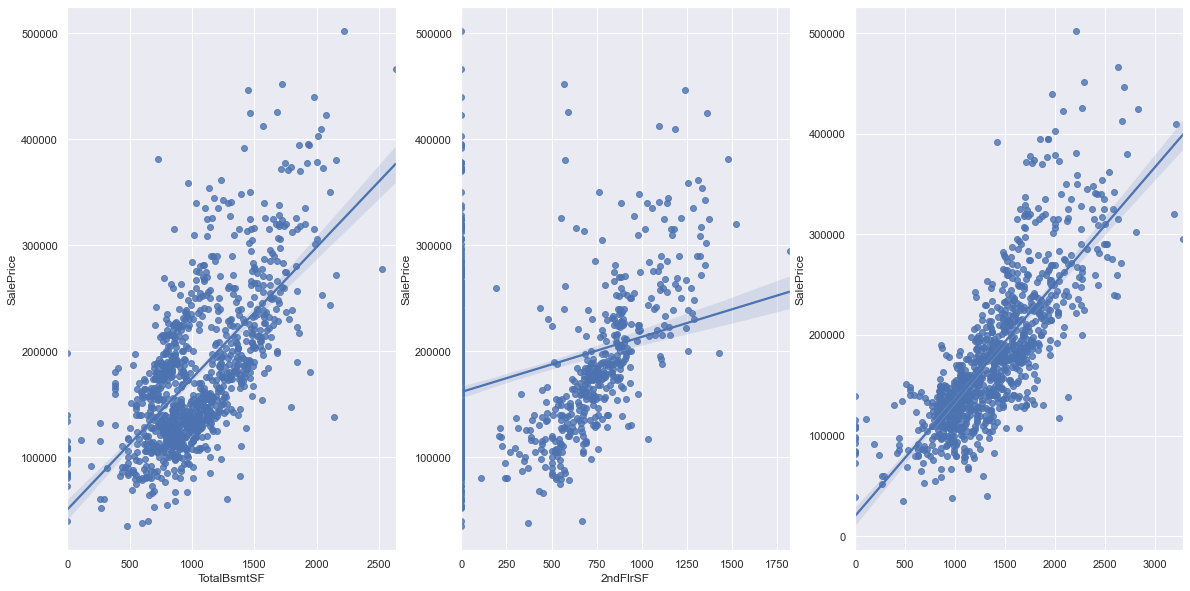

In [105]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(20,10)
_ = sns.regplot(hp1['TotalBsmtSF'], hp1['SalePrice'], ax=ax1)
_ = sns.regplot(hp1['2ndFlrSF'], hp1['SalePrice'], ax=ax2)
_ = sns.regplot(hp1['TotalBsmtSF'] + hp1['2ndFlrSF'], hp1['SalePrice'], ax=ax3)

In [106]:
hp1['TotalSF']=hp1['TotalBsmtSF']  + hp1['2ndFlrSF']

In [107]:
hp1['TotalBath']=hp1['BsmtFullBath'] + hp1['FullBath'] + hp1['BsmtHalfBath'] + hp1['HalfBath']

In [108]:
hp1['YrBltAndRemod']=(hp1['YearBuilt']+hp1['YearRemodAdd'])/2

In [109]:
hp1['Porch_SF'] = (hp1['OpenPorchSF'] + hp1['3SsnPorch'] + hp1['EnclosedPorch'] + hp1['ScreenPorch'] + hp1['WoodDeckSF'])

In [110]:
hp1['Has2ndfloor'] = hp1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasBsmt'] = hp1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasFirePlace'] = hp1['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
hp1['Has2ndFlr']=hp1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp1['HasBsmt']=hp1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [111]:
hp1['LotArea'] = hp1['LotArea'].astype(np.int64)
hp1['MasVnrArea'] = hp1['MasVnrArea'].astype(np.int64)

Skew of SalePrice: 1.0846466565875712


(array([ 33., 218., 302., 212., 121.,  54.,  35.,  16.,   8.,   2.]),
 array([ 35311. ,  81963.6, 128616.2, 175268.8, 221921.4, 268574. ,
        315226.6, 361879.2, 408531.8, 455184.4, 501837. ]),
 <BarContainer object of 10 artists>)

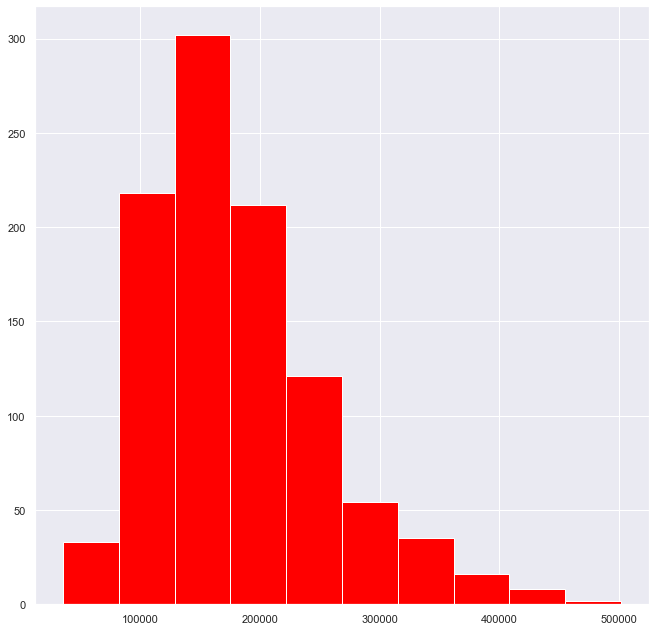

In [112]:
fig = plt.figure(figsize=(11,11))

print ("Skew of SalePrice:", hp1.SalePrice.skew())
plt.hist(hp1.SalePrice, color='red')
plt.show()

Skew of Log-Transformed SalePrice: -0.11368467748733432


(array([  4.,   7.,  11.,  72., 197., 248., 246., 138.,  63.,  15.]),
 array([10.47194981, 10.73735789, 11.00276598, 11.26817406, 11.53358214,
        11.79899023, 12.06439831, 12.32980639, 12.59521448, 12.86062256,
        13.12603064]),
 <BarContainer object of 10 artists>)

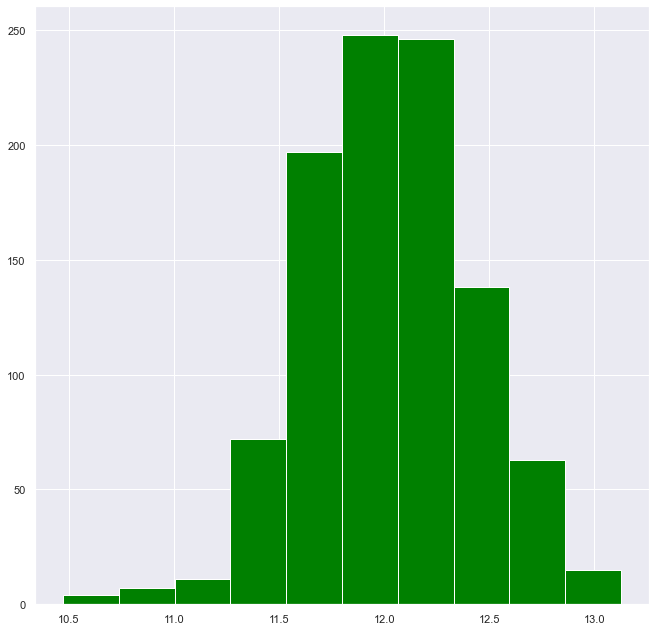

In [133]:
fig = plt.figure(figsize=(11,11))

print ("Skew of Log-Transformed SalePrice:", np.log(hp1.SalePrice).skew())
plt.hist(np.log(hp1.SalePrice), color='green')
plt.show()

In [114]:
aa = hp1.select_dtypes(include='object')
aa.isnull().any()


MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [115]:
hp1

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,YrSold,SalePrice,TotalSF,TotalBath,YrBltAndRemod,Porch_SF,Has2ndfloor,HasBsmt,HasFirePlace,Has2ndFlr
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2008,208500,1710,4,2003.0,61,1,1,0,1
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2008,223500,1786,4,2001.5,42,1,1,1,1
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,2006,140000,1512,2,1942.5,307,1,1,1,1
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2008,250000,2198,4,2000.0,276,1,1,1,1
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2007,307000,1686,3,2004.5,312,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,2006,145000,547,2,2005.0,28,0,1,0,0
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,2006,84500,1140,1,2006.0,92,0,1,0,0
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,2009,185000,1221,3,2004.5,113,0,1,0,0
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2007,175000,1647,3,1999.5,40,1,1,1,1


In [116]:
X = hp1.drop(['SalePrice'], axis=1)
y = np.log(hp1['SalePrice'])

In [117]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [118]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() <= 30 and
                    X[cname].dtype == "object"] 
                


numerical_cols = [cname for cname in X.columns if
                 X[cname].dtype in ['int64','float64']]


my_cols = numerical_cols + categorical_cols



In [119]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='constant'))
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),       
        ('cat',cat_transformer,categorical_cols),
        ])

In [120]:
# save the output of preprocessor, based on X_train
g = preprocessor.fit_transform(X)
g_array = np.asarray(g.todense())
np.savetxt("gex.csv", g_array, delimiter=",")

# save the output of preprocessor, based on y_train

f_array = np.asarray(y)
np.savetxt("y.csv", f_array)